In [1]:
import numpy as np
import matplotlib.pyplot as plt
from methods import IBU, NPU


In [2]:
R = np.array([[0.9,0.1],[0.1,0.9]])

In [3]:
N = 10000 #total number of counts
t = np.array([0.5,0.5])*N #truth level distribution
m = [np.random.poisson(t[i]) for i in range(len(t))] #include stat fluctuations
m = np.random.multinomial(m[0],R[:,0])+ np.random.multinomial(m[1],R[:,1]) #include detector resolutions
p = [0.1,0.9] #prior

In [4]:
ibu = IBU(m,p,R,5)
npu,mle = NPU(m,R,N)

2023-01-26 10:40:30.807976: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 10:40:32.600214: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38277 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:03:00.0, compute capability: 8.0
2023-01-26 10:40:32.602752: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38277 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2023-01-26 10:40:32.606786: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

Text(0, 0.5, 'Bin 2 Counts')

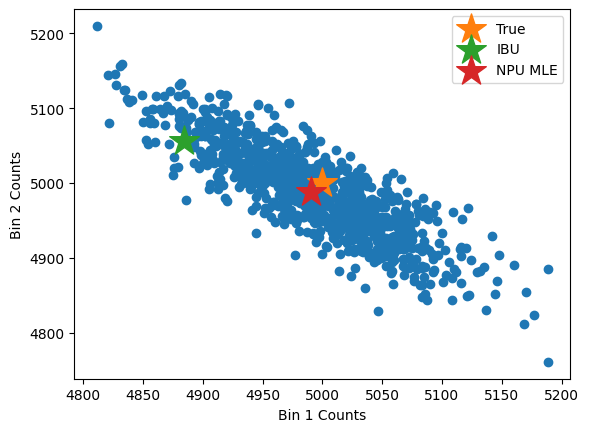

In [5]:
plt.scatter(npu[:,0],npu[:,1])
plt.scatter(t[0],t[1], marker='*', label="True",s=500)
plt.scatter(ibu[0],ibu[1], marker='*', label="IBU",s=500)
plt.scatter(mle[0],mle[1], marker='*', label="NPU MLE",s=500)
plt.legend()
plt.xlabel("Bin 1 Counts")
plt.ylabel("Bin 2 Counts")

Text(0.5, 0, 'Bin 1 Counts')

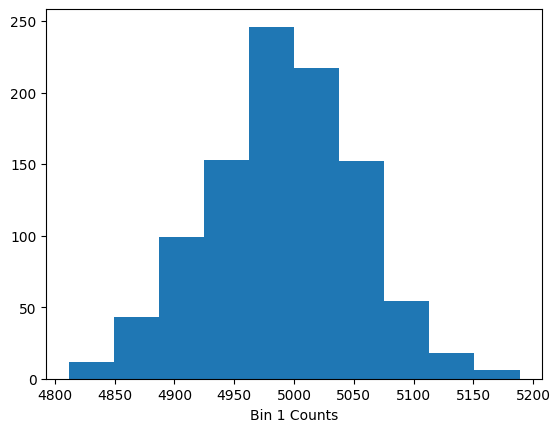

In [6]:
plt.hist(npu[:,0])
plt.xlabel("Bin 1 Counts")

In [7]:
R2 = np.array([[0.5,0.5],[0.5,0.5]])

In [8]:
t2 = np.array([0.5,0.5])*N #true
m2 = [np.random.poisson(t2[i]) for i in range(len(t2))] #stat fluctuations
m2 = np.random.multinomial(m2[0],R2[:,0])+np.random.multinomial(m2[1],R2[:,1]) #resolutions
p2 = [0.1,0.9] #prior

In [9]:
ibu2 = IBU(m2,p2,R2,5)
npu2,mle2 = NPU(m2,R2,N)

Text(0, 0.5, 'Bin 2 Counts')

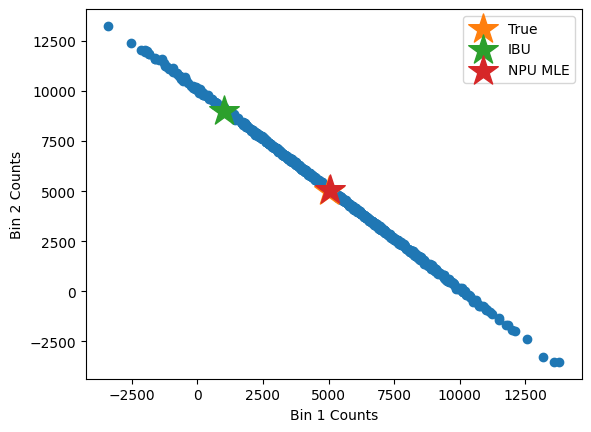

In [10]:
plt.scatter(npu2[:,0],npu2[:,1])
plt.scatter(t2[0],t2[1], marker='*', label="True",s=500)
plt.scatter(ibu2[0],ibu2[1], marker='*', label="IBU",s=500)
plt.scatter(mle2[0],mle2[1], marker='*', label="NPU MLE",s=500)
plt.legend()
plt.xlabel("Bin 1 Counts")
plt.ylabel("Bin 2 Counts")

Text(0.5, 0, 'Bin 1 Counts')

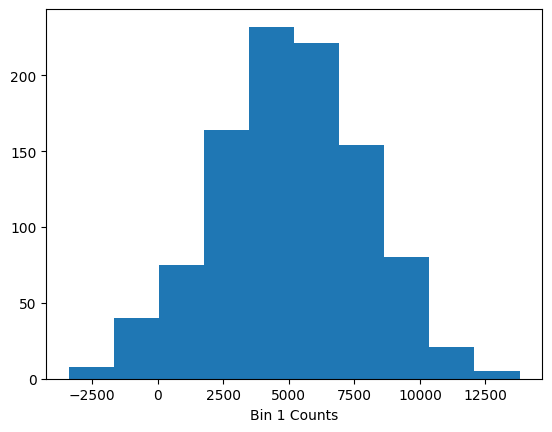

In [11]:
plt.hist(npu2[:,0])
plt.xlabel("Bin 1 Counts")